- 주요 내용
    - 선형회귀 이해
    - 경사하강법을 통한 가중치와 절편 업데이트
    - 손실함수를 이용한 가중치와 절편 업데이트
    - 선형회귀를 위한 클래스 생성 (손실함수 업데이트 활용)
---
- *주요 내용은 본 챕터에서 다루는 내용을 내용 중심으로 변경하여 사용하였으며, 아래 제목은 책의 제목을 그대로 따릅니다*
- *문과생이 스스로 학습하기 위한 자료입니다. 혹시 틀린 부분이 있다면 알려주시면 감사하겠습니다*
---

# 3-1. 선형회귀에 대해 알아보고 데이터를 준비합니다.
- 사이킷런 당뇨병 환자 데이터 사용

In [43]:
from IPython.display import Image

## 3-1-1. 1차 함수로 이해하는 선형회귀

#### 당뇨병 환자 데이터 준비

> 1. load_diavetes() 함수로 데이터 불러오기

In [1]:
# 데이터셋을 가져오기 위한 모듈 import
from sklearn.datasets import load_diabetes

In [2]:
# 데이터 읽어오기
diabetes = load_diabetes()
# 어떻게 생겼는지 확인하기
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

데이터는 파이썬의 dict형과 유사하게 생긴 Bunch 클래스 : 딕셔너리 데이터로 봐도 무방

> 2. 데이터 크기 확인하기

In [7]:
# 데이터 모양 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


> 3. 입력 데이터 자세히 보기

In [9]:
# data는 442개의 array로 구성/ 1개의 array가 10개의 값으로 구성되어 있음
diabetes.data, diabetes.data.shape

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 (442, 10))

In [11]:
# 0번 샘플만 확인해보기
# 총 10개의 특성에 대한 값이 data의 1번 value를 구성하고 있음
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

> 4. target 데이터 자세히 보기

In [8]:
# target 데이터는 442개의 값으로 구성
diabetes.target, diabetes.target.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

In [13]:
# target data는 10개의 요소로 구성된 입력데이터 sample 1개에 대응하는 하나의 값
# 0-2번 샘플에 대응하는 값
diabetes.target[0:3]

array([151.,  75., 141.])

#### 당뇨병 환자 데이터 시각화

> 1. 산점도 그리기

- 당뇨병 환자 data에는 하나의 샘플에 10개 특성 값이 대응
- 10개 특성을 모두 평면으로 나타낼 수 없어 특정 특성값 하나를 선택해서 그림을 그려보고자 함

In [19]:
# 전체 데이터에서 특정 feature만 추출 (3번)
# indexing을 통해 row는 전체 선택 ':' 기호로 처음부터 끝까지
# 각 array에서 3번째에 있는 (0, 1, 2) feature의 값들만 모아서 보겠음 -> [:, 3]
# shape으로 보면 (442,) : 442개의 sample이 있음
diabetes.data[:, 2], diabetes.data[:, 2].shape

(array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
        -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
        -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
        -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
        -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
        -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
         0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
        -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
        -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
        -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
        -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
        -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
        -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
        -0.02452876, -0.01806189, -0.01482845, -0.0

--> 위에서 도출한 sample들의 3번 특성을 x값으로, 전체 데이터의 target을 y값으로 해서 산점도를 그리고자 함

In [14]:
# scatter plot을 그리기 위한 모듈 import
import matplotlib.pyplot as plt

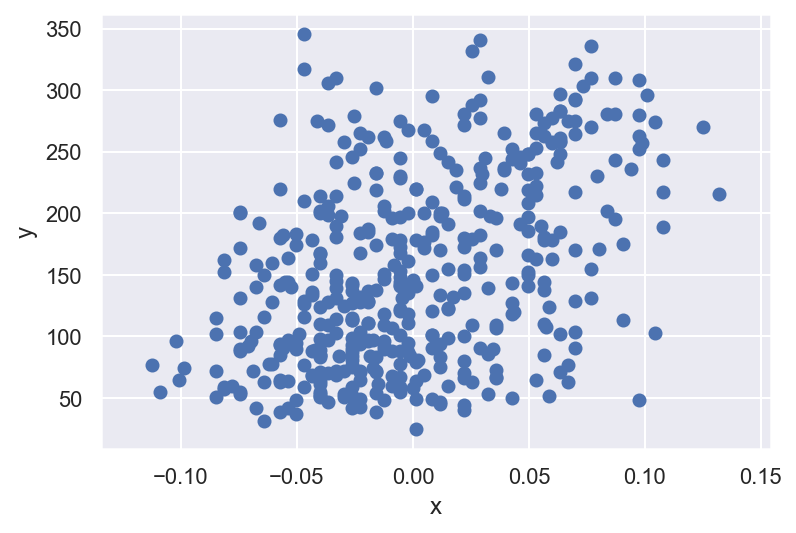

In [25]:
# ;기호를 써주면 위에 문자가 안나타남
plt.scatter(diabetes.data[:, 3], diabetes.target);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> 2. 훈련 데이터 준비하기

In [26]:
# diabetes.data, target으로 접근하기 번거로우니 변수에 저장
x = diabetes.data[:, 2] # 역시 3번 특성만 x값으로 활용
y = diabetes.target

---

# 3-2. 경사하강법으로 학습하는 방법을 알아봅니다.

- 예측값과 변화율 이해하기 
- 일반적인 1차식 *y= ax + b* : a는 기울기, b는 y절편
- *ŷ = wx + b*
- 실제값을 y, 예측값을 ŷ으로 표기/ 가중치를 w, 절편을 b로 표현

## 3-2-1. 예측값으로 올바른 모델 찾기
- 훈련데이터에 잘 맞는 w와 b를 찾는 방법
    - 1) 무작위로 w, b 설정 (모르기 때문에)
    - 2) x에서 샘플하나를 선택하여 ŷ _예측값 계산
    - 3) 예측값과 실제 y값을 비교
    - 4) 예측값이 실제값에 가까워지도록 w, b를 조정
    - 5) 2-4 단계 반복 

> 1. w와 b 초기화하기 (임의 설정)

In [28]:
w = 1.0
b = 1.0

> 2. 훈련데이터의 첫 번째 샘플 제이터로 ŷ (예측값) 얻기

In [30]:
# x[0] : 3번 특성의 첫번째 값
y_hat = x[0] * w + b
y_hat

1.0616962065186886

> 3. 실제 타깃값과 예측데이터 비교

In [32]:
# y실제값과 ŷ의 비교
y[0]

151.0

> 4. w값 조절해서 예측값 바꾸기

In [33]:
y[0] - y_hat

149.9383037934813

In [34]:
# w를 0.1만큼만 변화시키고 y_hat이 얼마나 변하는지 관찰
w_inc = w + 0.1 #가중치 변경
y_hat_inc = x[0] * w_inc + b #변경된 가중치를 적용해서 변경된 예측값 도출
y_hat_inc

1.0678658271705574

> 5. w값 조정 후 예측값의 증가 정도 확인하기

In [35]:
# 예측값의 증가량을 가중치 증가량으로 나누어 변화율을 구함
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

변화율을 구하고 보니 x[0]과 같음
- 증명은 아래서 확인할 수 있음

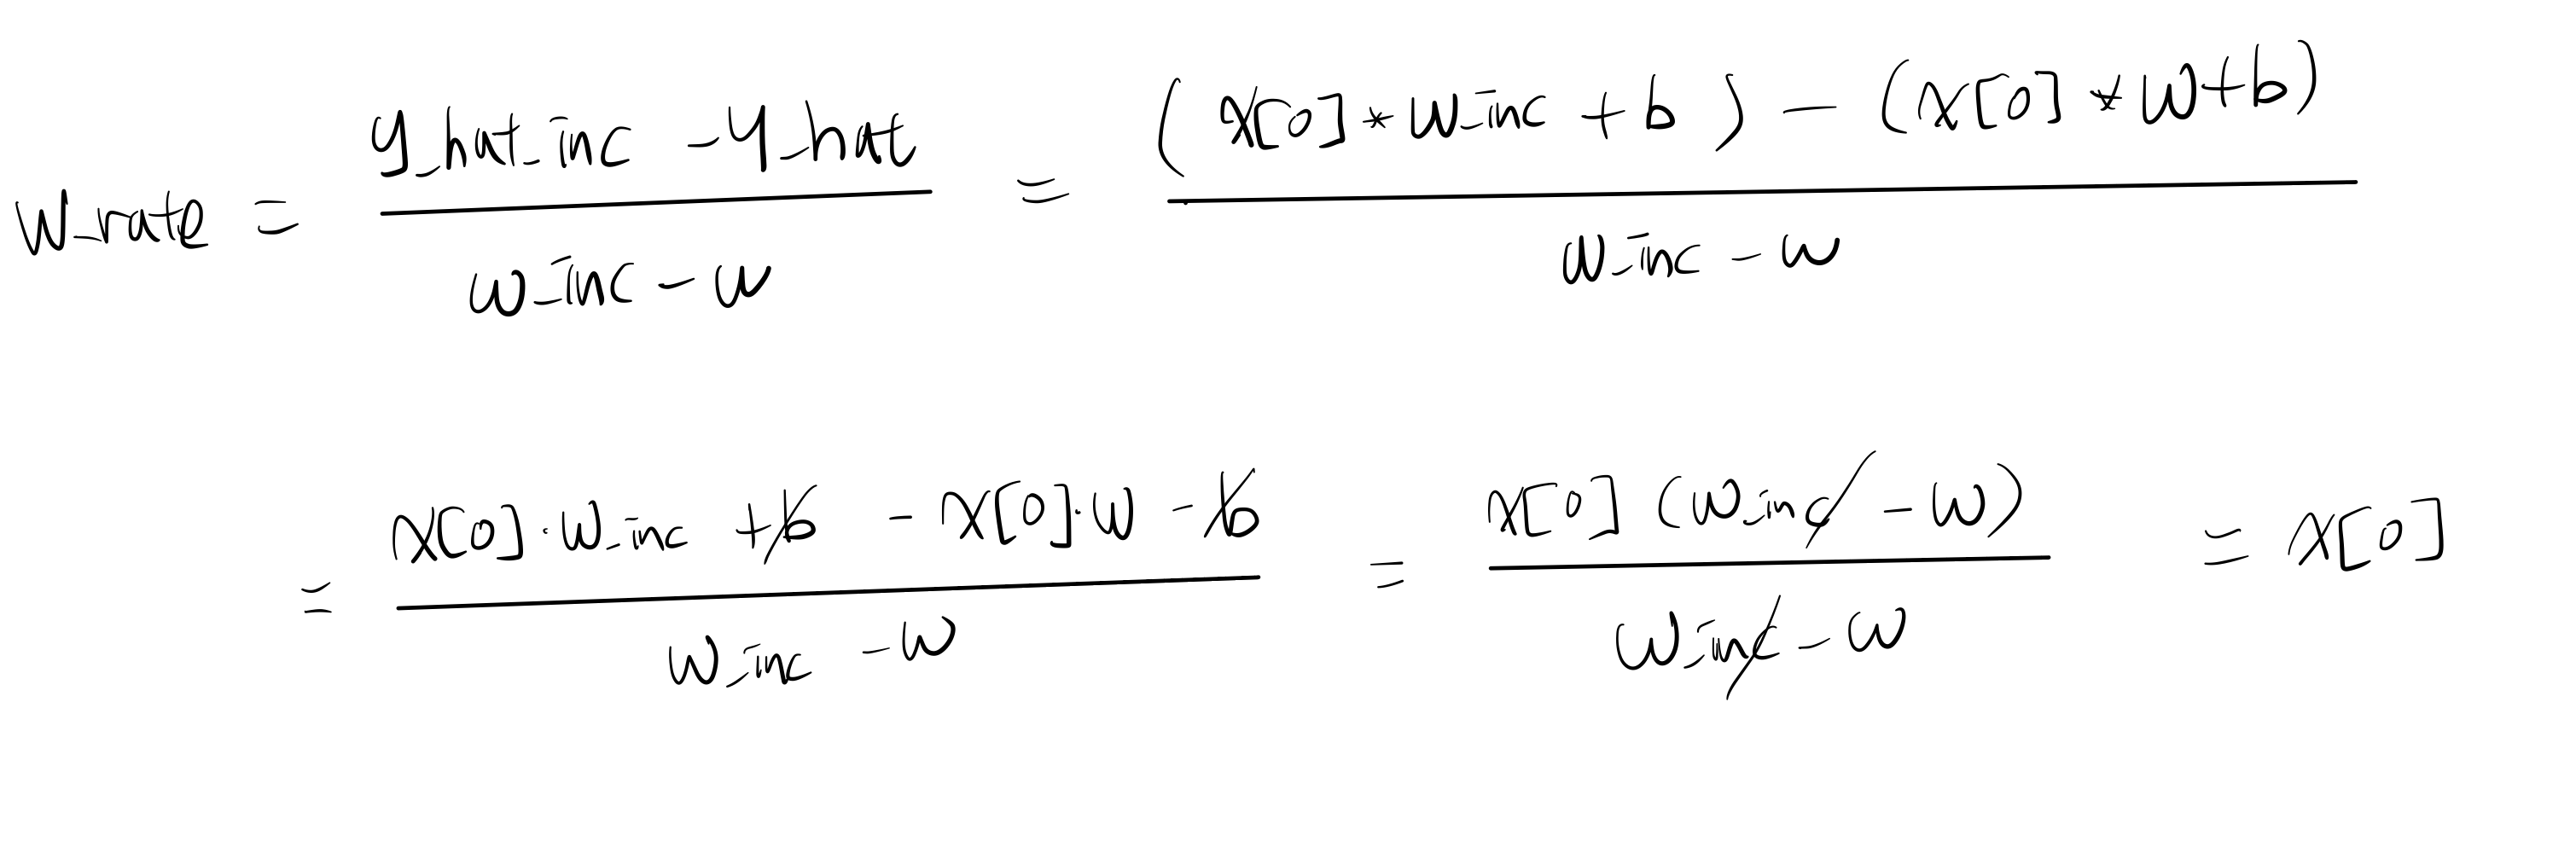

In [78]:
Image("./image/변화율증명.png", width=700)

## 3-2-2. 변화율로 가중치 업데이트 하기

### 변화율이 양수일 때와 음수일 때
- 변화율이 양수일 때 가중치 업데이트 (가중치를 높이면 y_hat 값이 같이 올라갈 때)
    - 변화율이 양수라면 w를 키우는 방법으로 가중치를 업데이트 할 수 있음
    - 기존의 w값에 변화율을 더해서 업데이트 가능
- 변화율이 음수일 때 가중치 업데이트 (가중치를 높였는데 y_hat 값이 내려갈 때)
    - 변화율이 음수일 때 w를 감소시키는 방법으로 업데이트 가능
    - 변화율 자체가 음수라면 기존의 w값에 음수의 변화율을 더해서 빼는 효과를 볼 수 있음
- 변화율의 부호와 관계 없이 기존의 가중치에 변화율을 더하는 방법으로 가중치 없데이트 가능
    - *w + w_rate*

In [46]:
# 새로운 가중치 만들기
w_new = w + w_rate
w_new

1.0616962065186888

## 3-2-3. 변화율로 절편 업데이트 하기
- 가중치와 동일하게 절편 b에 대한 변화율을 구해서 변화율로 b를 업데이트

In [48]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc # 변화율 업데이트로, 가중치의 업데이트는 지금 반영하지 않음
y_hat_inc

1.1616962065186887

In [49]:
# 절편 b의 변화율 구하기
# w와 동일하게 y_hat의 증가율을 b의 증가율로 나누어 줌
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

절편 b의 변화율을 1
- b를 1만큼 증가시키면 y_hat도 똑같이 1만큼 증가
- w*x 뒤에 더해지는 값으로, 절편이 1커지면 그래프가 y 방향으로 1만큼 올라가기 때문에 변화율은 1
- 증명은 아래에서 확인

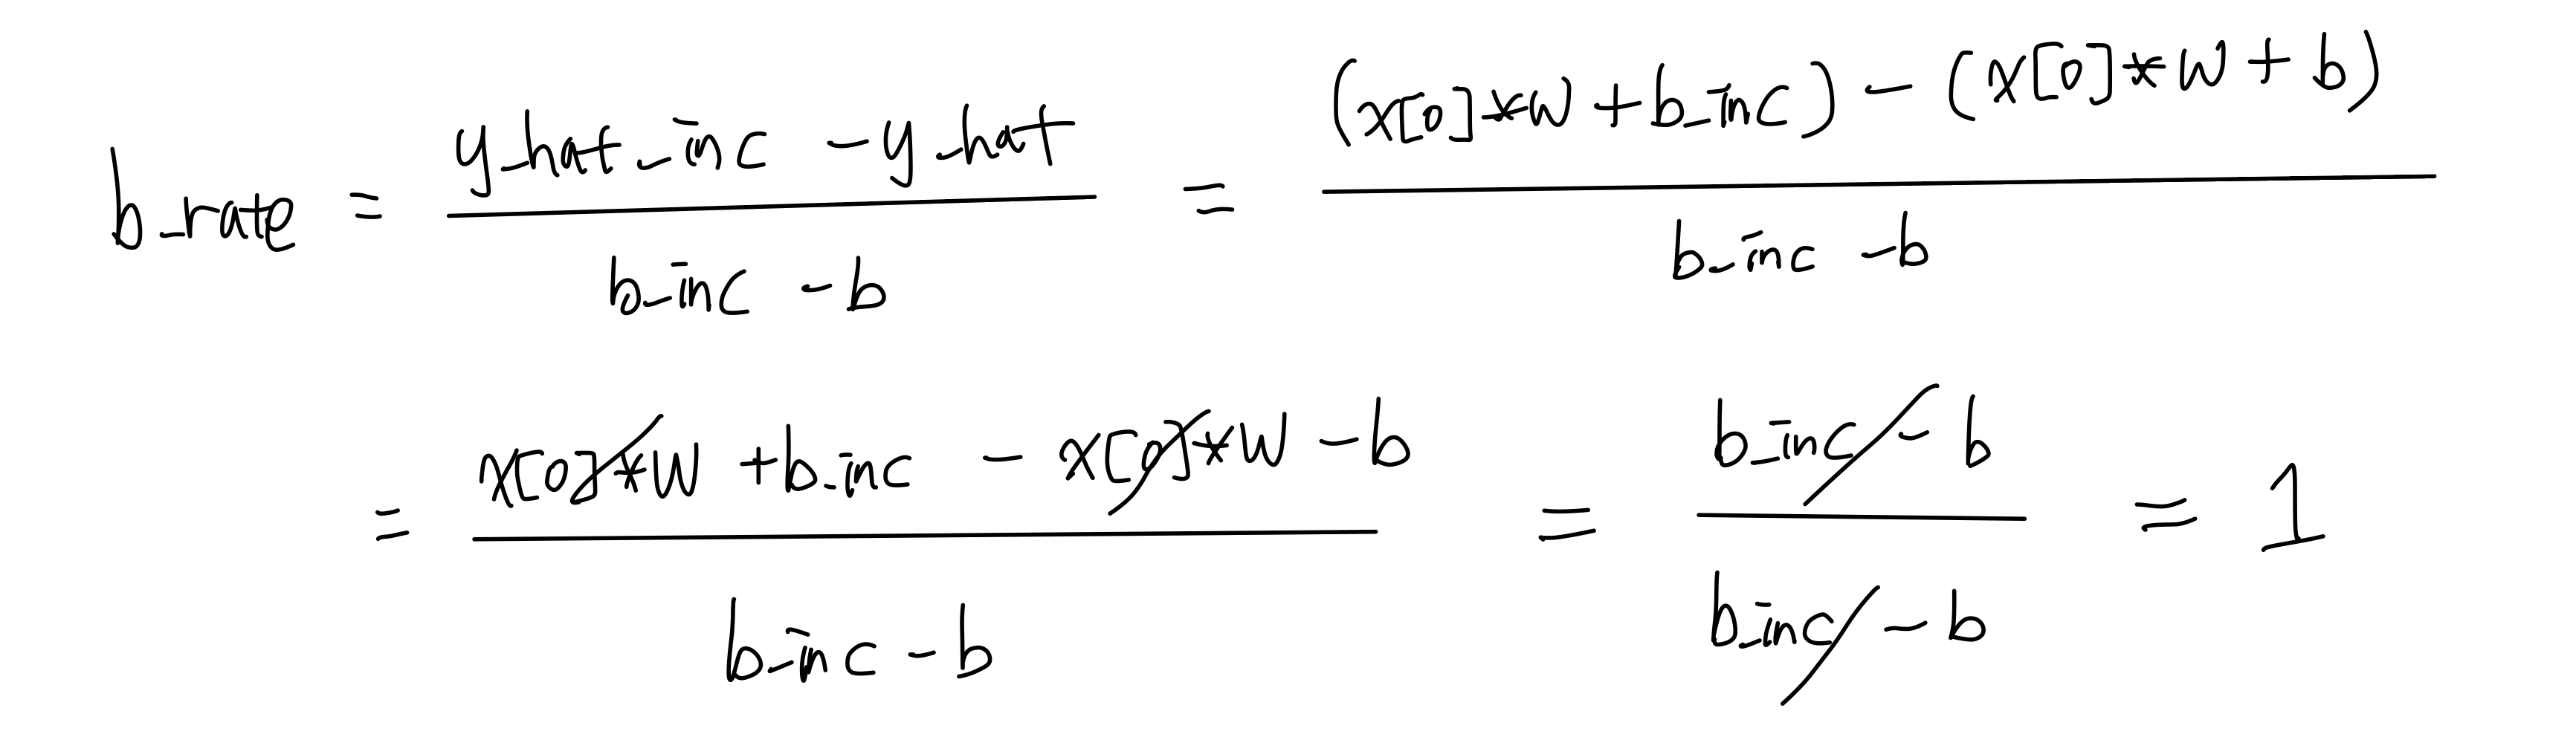

In [77]:
Image("./image/절편변화율증명.png", width=700)

In [51]:
# b를 업데이트 하기 위해서는 w에 w_rate를 더했던 것처럼 b에 b_rate, 즉 1을 더해주면 됨
b_new = b + 1
b_new

2.0

## 3-2-4. 오차 역전파로 가중치와 절편을 더 적절하게 업데이트 하기

- 가중치와 절편을 더 적절하게 업데이트 하기
    - 오차를 연이어 뒤로 전파하여 w와 b를 적절하게 업데이트
    - 앞의 예제처럼 y와 y_hat의 차이가 너무 크다면 업데이트에 시간이 많이 걸림
    - 업데이트 중에 y_hat이 y보다 커져서 다시 감소시켜야 한다면?
- *y에서 y_hat을 뺀 오차의 양을 변화율에 곱하는 방법으로 w를 업데이트*
    - y_hat과 y의 차이가 클 땐 큰 폭으로 변화할 수 있음
    - y_hat이 y를 지나쳐 갔을 땐 다시 감소시킬 수 있음
    - w_rate * err -> w를 업데이트

> 1. 오차와 변화율을곱하여 가중치 업데이트

In [52]:
# 먼저 오차 구해주기
err = y[0] - y_hat
# w 업데이트 w에 오차와 변화율의 곱을 더한다
w_new = w + (w_rate * err)
b_new = b + (1 * err)
# 가중치 절편의 update 값 확인
w_new, b_new

(10.250624555904514, 150.9383037934813)

- 변화율 만으로 가중치를 업데이트 했을 때
    - w_new = 1.0616962065186888
    - b_new = 2
- 오차를 반영해서 w와 b를 업데이트 하니 숫자가 훨씬 커진것을 확인할 수 있음

> 2. 두 번째 샘플 x[1]로 오차를 구해서 w, b 업데이트

In [53]:
# 두 번째 샘플에 대한 예측값 도출
# 여기서의 가중치, 절편은 이전 샘플에서 구한 값을 사용
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + (w_rate * err)
b_new = b_new + (1 * err)
# 가중치 절편의 update 값 확인
w_new, b_new

(14.132317616381767, 75.52764127612664)

- 1번 샘플로 업데이트 했을 때
    - w_new = 10.250624555904514
    - b_new = 150.9383037934813
- w는 4만큼 커지고, b는 반으로 감소

> 3. 전체 샘플에 대해 반복하기

In [54]:
# x, y에서 하나씩 뽑아서 x_i, y_i로 대입하면서 계속 w, b를 업데이트
# print 하는 w, b는 최종 업데이트가 완료된 가중치와 절편
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + (w_rate * err)
    b = b + (1 * err)
print(w, b)

587.8654539985689 99.40935564531424


> 4. 산점도 그려보기 (데이터가 어떻게 펼쳐져 있는지 확인)

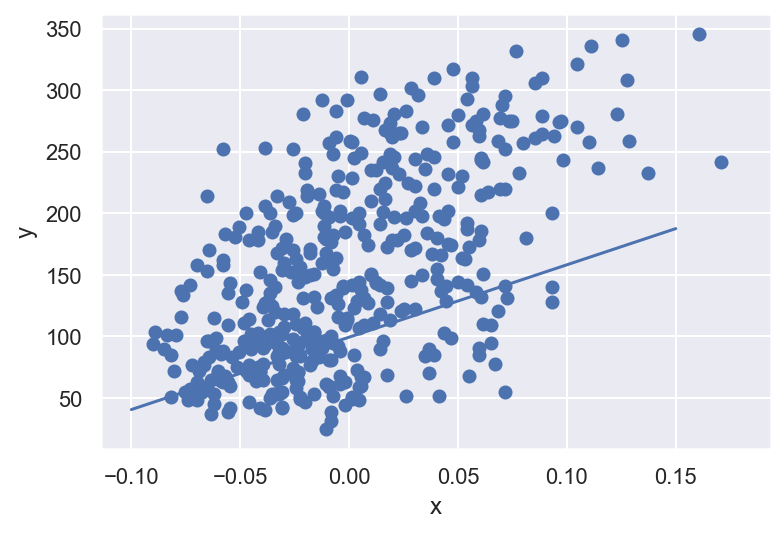

In [57]:
plt.scatter(x, y) #x, y의 값을 산점도로 그려주세요
# 산점도 위에 선 그리기
pt1 = (-0.1, -0.1 * w + b) # x=-0.1일 때 y값
pt2 = (0.15, 0.15 * w + b) # x=0.15일 때 y값
# -0.1과 y값을 첫 지점으로 0.15와 y값을 마지막 지점으로 해서 선그래프 그려주기
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# 아직은 우리가 만든 w와 b가 산점도를 잘 설명하지 못하는 것 같다

> 5. 여러번 반복해보기

- 전체 훈련 데이터를 이용해서 한 단위의 작업을 진행하는 것을 에포크라고 함
- 여러 에포크를 반복시켜서 직선의 이동을 살펴볼 수 있음

In [58]:
# 동일한 코드 위에 i를 100번 반복하는 for loop 하나를 추가
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + (w_rate * err)
        b = b + (1 * err)
print(w, b)

913.5973364345905 123.39414383177204


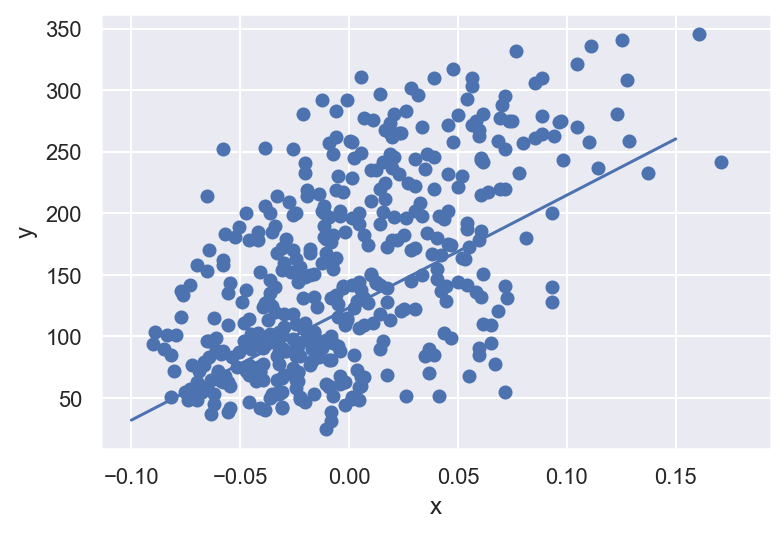

In [59]:
# 변경된 w, b로 다시 직선 그려보기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b) 
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# 산점도를 훨씬 더 잘 대표하는 것으로 보임

> 6. 모델로 예측하기

- 학습한 데이터에 없는 값이 나왔을 때 계산하기

In [60]:
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

- summary
    - 모델을 만든 과정
        - w, b를 임의의 값인 1로 초기화 하고 훈련데이터 샘플을 하나씩 대입하여 y_hat을 구함
        - y와 y_hat의 오차를 w, b의 변화율에 곱해서 w와 b에 각각 더하는 방식으로 w, b를 업데이트 함
        - 만약 y_hat이 y보다 커지면 오차가 음수가 되어서 자동으로 w와 b가 줄어드는 방향으로 업데이트 됨
        - y_hat이 y보다 작으면 오차는 양수가 되어 w, b는 더 커지도록 업데이트 됨

---

# 3-3. 손실함수와 경사하강법의 관계를 알아봅니다

## 3-3-1. 손실함수 이해하기
- 경사하강법을 기술적으로 표현한다면
    - "어떤 손실함수가 정의되었을 때 손실함수의 값이 최소가 되는 지점을 찾아가는 방법"
- 앞서 사용한 오차를 변화율에 곱해서 가중치와 절편을 업데이트 하는 방법은 '제곱 오차'라는 손실함수를 미분한 것과 같음
    - 제곱오차 : SE = (y-ŷ)**2
    - 타깃값과 예측값의 차이를 제곱한 것
    - 제곱 오차가 최소가 되면 산점도 그래프를 가장 잘 표현한 직선이 그려짐

- 제곱오차는 2차식으로 2차식 기본 그래프를 그려보면 다음과 같음
    - 가중치가 증가하면서 오차가 감소하는 구간과 가중치의 증가와 함께 오차가 같이 증가하는 구간이 있음
    - 그래프에서 접선의 기울기가 0인 점이 2차 함수식의 최소(음수 그래프라면 최고) 지점이 됨
    - 그래프의 최저점을 기준으로 왼쪽은 기울기가 음수이고 이 때는 가중치를 증가시켜야 함
    - 최저점의 오른쪽은 기울기가 양수이고 이 때는 가중치를 감소시켜야 함

> 가중치에 대한 제곱오차 미분

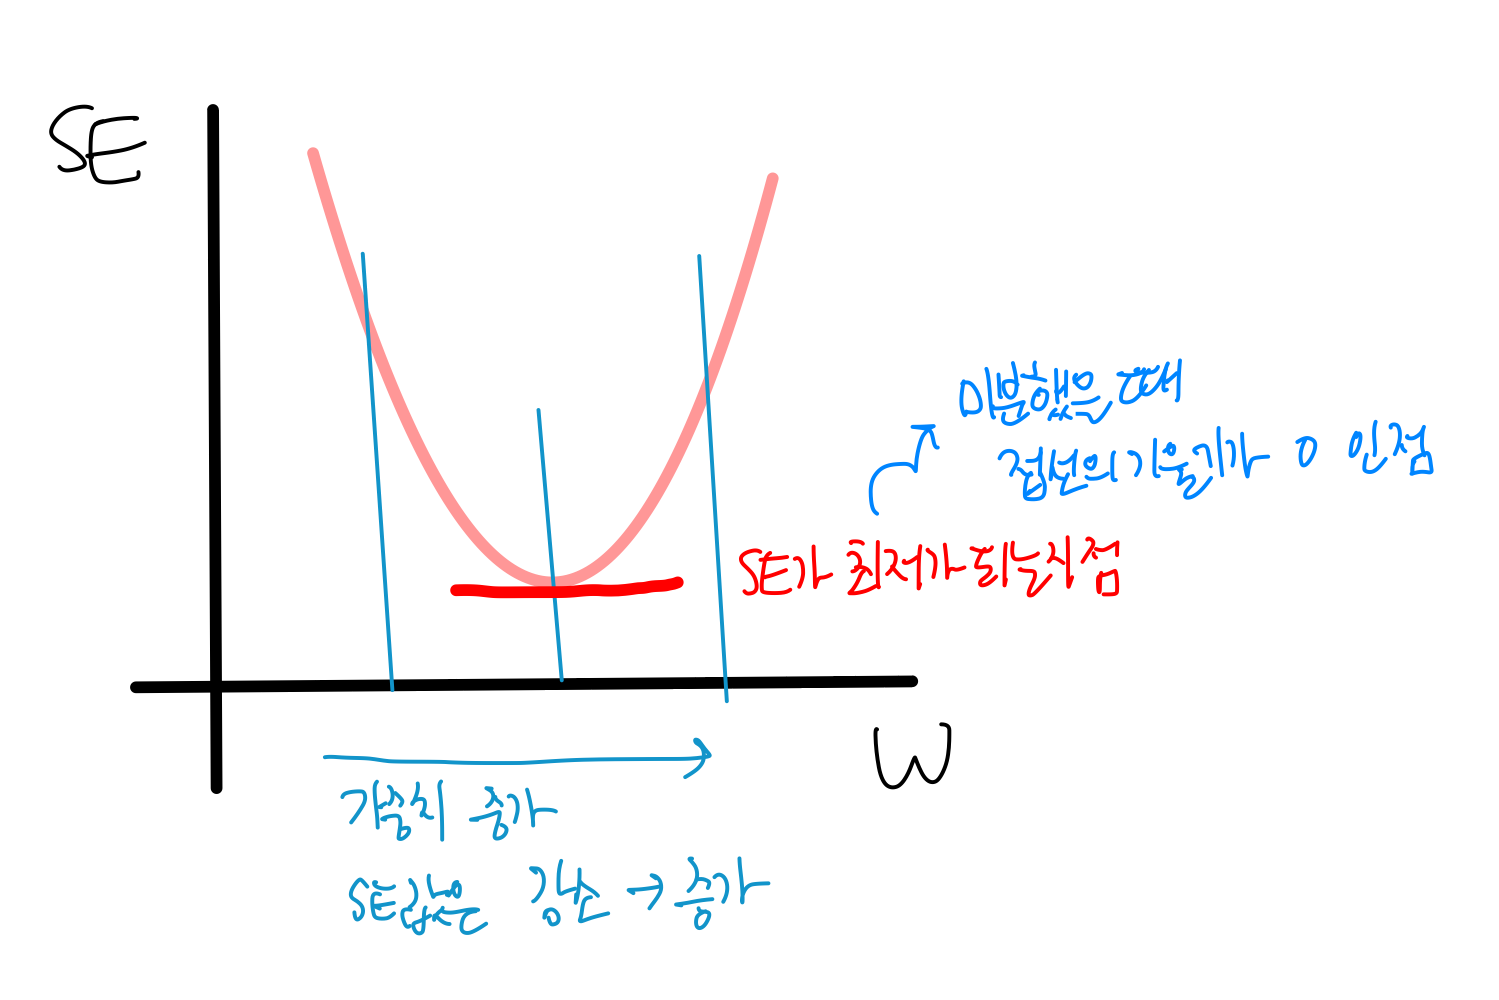

In [72]:
# 접선의 기울기를 구하기 위해서는 미분을 해야 함
# 미분이 한 점에서의 접선의 기울기를 의미함
Image("./image/2차식그래프.png", width=500)

- 가중치에 대해 제곱오차 미분하기

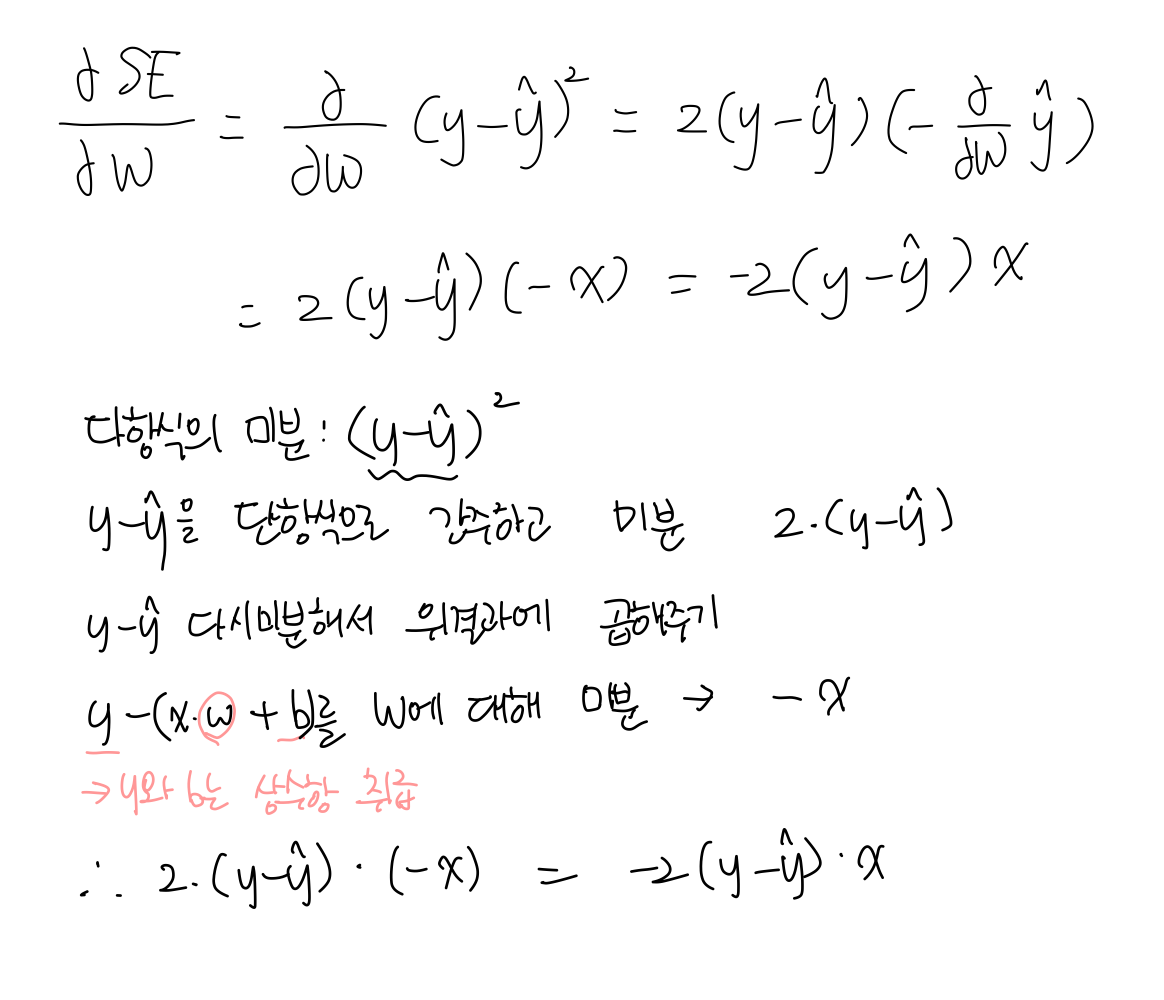

In [82]:
# 책에서 제시한 미분 식과 아래 다항식의 미분 방법에 대한 설명
Image("./image/제곱오차w에대해미분.png", width=600)

- 결국 제곱오차를 가중치에 대해 미분하면 *-2*(y-y_hat)*x* 가 나옴
- 초기에 제곱 오차 공식에 1/2을 곱했더라면 미분 결과 -(y-y_hat)x가 나왔을 것임
- 손실함수에 상수항을 곱하는 것은 최종 모델의 가중치나 절편에 영향을 주지는 않으므로 제곱오차를 2로 나눈 손실함수를 편미분 함

- 가중치에 대한 제곱 오차의 변화율을 구함 (SE를 w에 대해 미분한 것)
- 가중치 업데이트 시 변화율을 더했던 것처럼 w에서 변화율을 빼줌
    - 손실함수의 낮은 쪽으로 이동하고자 하기 때문

- 결국 제곱오차를 이용하는 방법에서의 가중치는 w_rate에 err를 곱했던 앞서 작성한 코드와 동일함
- 앞에서 작성한 코드 : w + w_rate * err

```
w = w - (-(y-ŷ)x) = w + (y-ŷ)x 
```

In [80]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

> 절편에 대한 제곱오차 미분

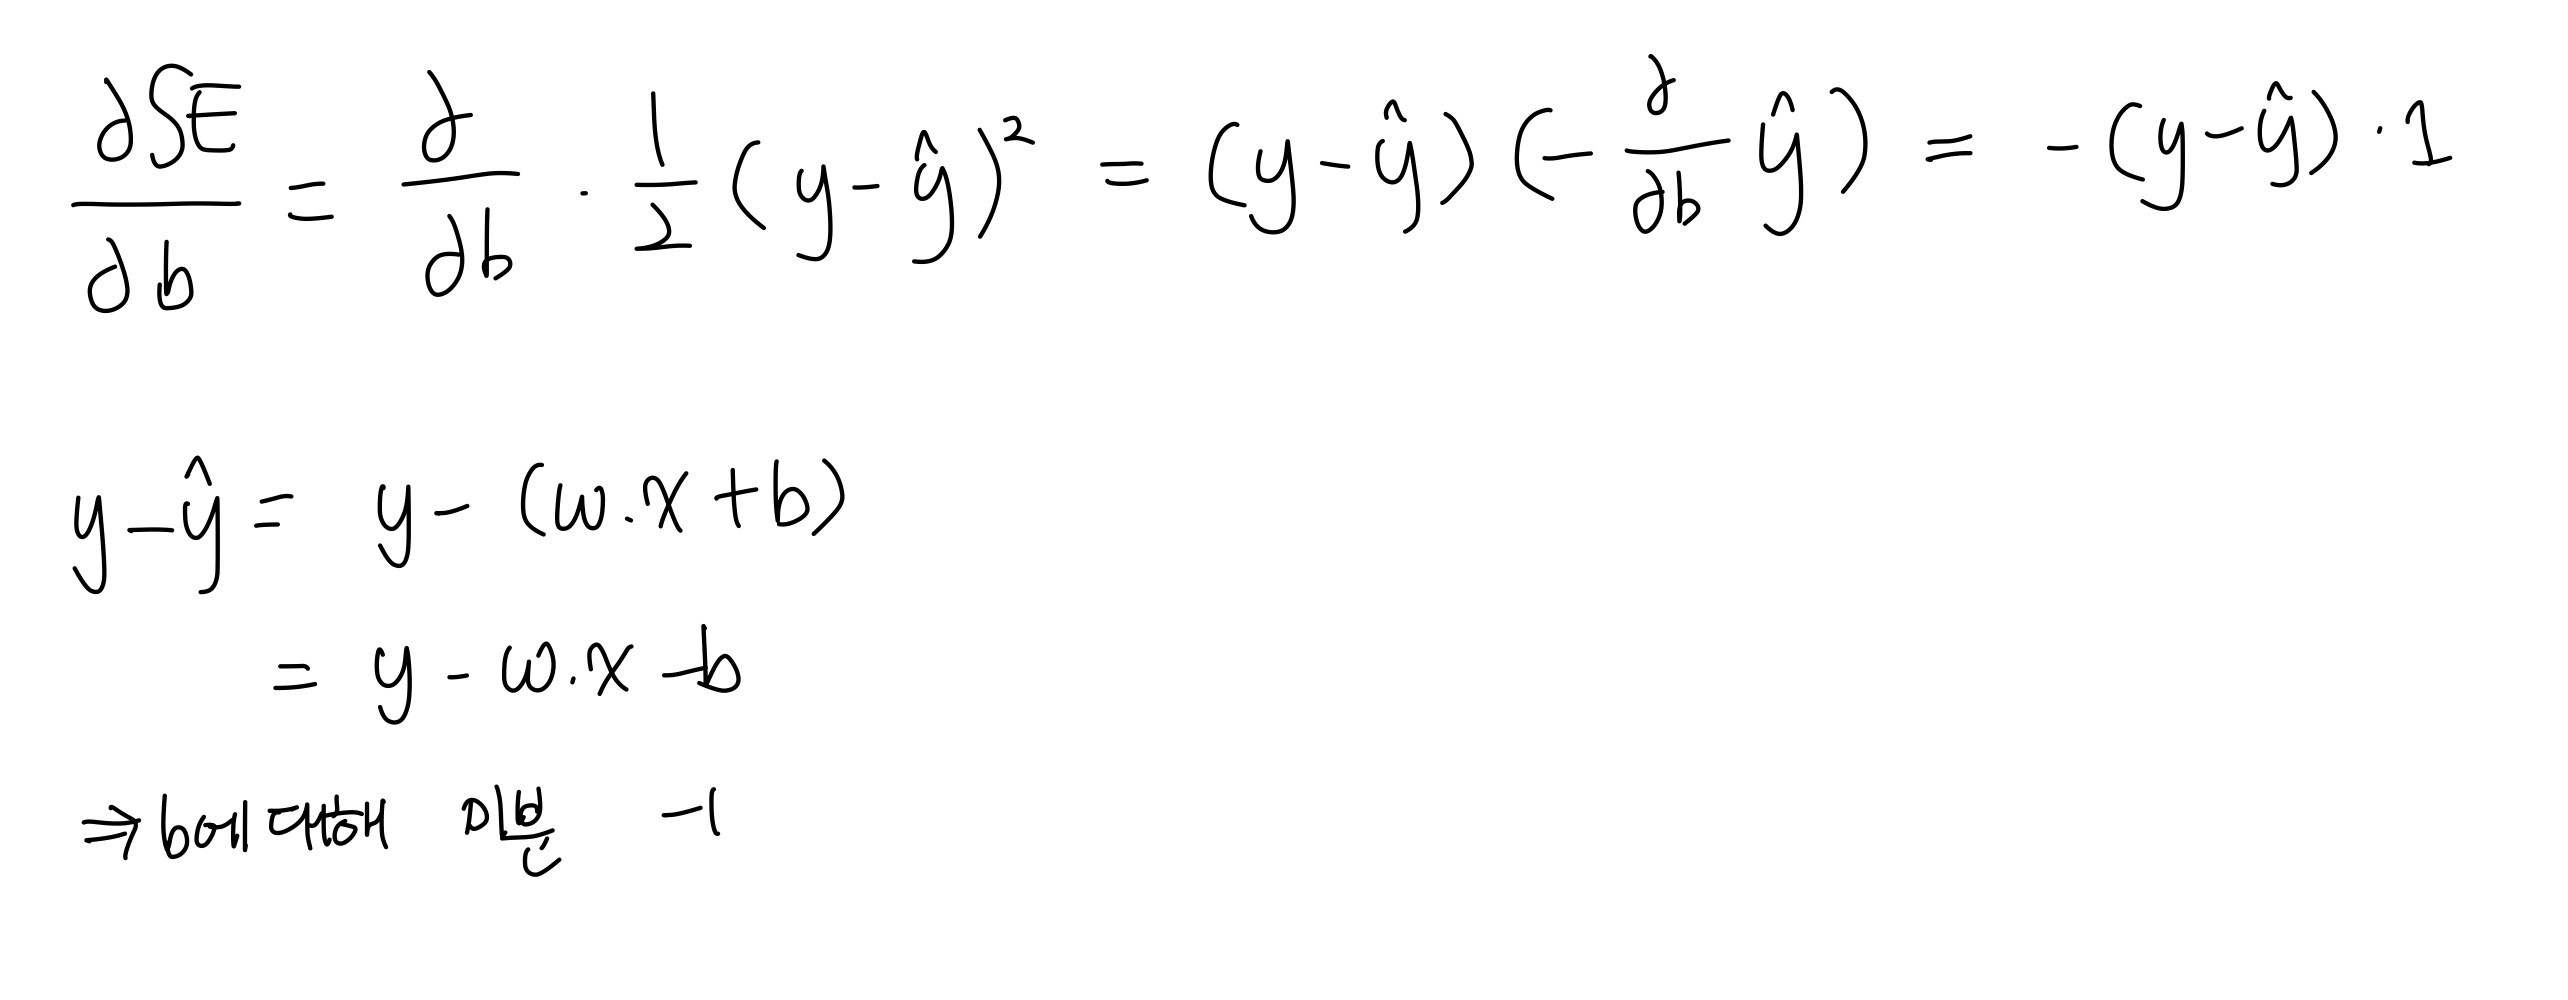

In [83]:
Image("./image/제곱오차절편에대해미분.png", width=600)

- 이 식도 앞에서 작성한 코드와 일치함

In [84]:
err = y_i - y_hat
b = b + 1 * err

- 변화율을 하나씩 계산하는 대신 편미분을 사용하여 변화율을 계산
    - 변화율을 인공지능 분야에서는 '그라디언트'라고 부름

# 3-4. 선형회귀를 위한 뉴런을 만듭니다.

## 3-4-1. 뉴런 클래스 만들기

In [85]:
class Neuron:
    # 변수선언을 위한 init method
    def __init__(self):
        # 가중치와 절편 초기값 설정
        self.w = 1.0
        self.b = 1.0
        
    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 오차의 역전파를 반영하여 w, b 업데이트
    def backprop(self, x, err):
        # 여기서 x는 앞에서 확인했던 가중치의 변화율이 x와 같다는 것으로 이해
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 훈련을 위한 fit method 구현
    def fit(self, x, y, epochs=100):
        for i in range(100):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i) # 각각 하나씩 정방향 계산
                err = -(y_i - y_hat) # 제곱오차를 절편/가중치에 대해 미분했을 때 나온 값 -(y - y_hat)
                w_grad, b_grad = self.backprop(x_i, err) # 가중치와 절편의 변화율을 오차 역전파를 통한 gradient로 구함
                self.w -= w_grad # w에서 변화율을 빼는 방법으로 업데이트
                self.b -= b_grad # b에서 변화율을 빼는 방법으로 업데이트

In [86]:
# 모델 훈련
neuron = Neuron()
neuron.fit(x, y)

> 학습이 완료된 모델 가중치와 절편 확인하고 그림그리기

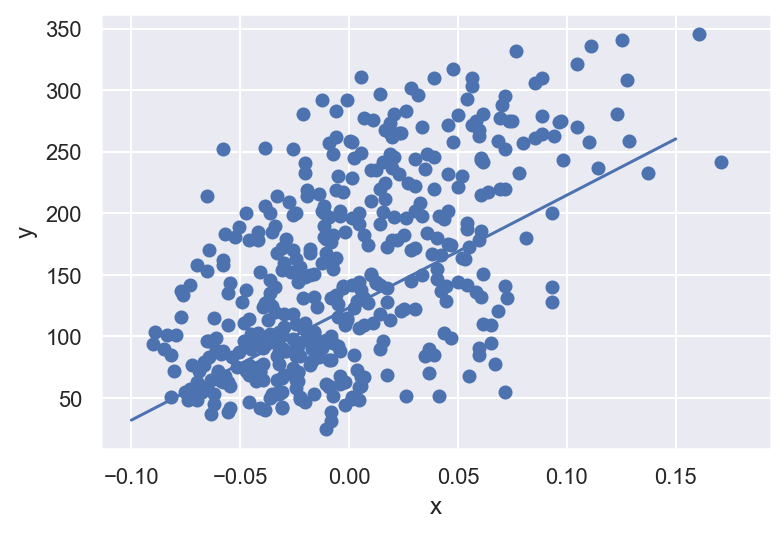

In [87]:
# neuron을 활용한 w, b로 다시 직선 그려보기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b) 
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# 산점도를 훨씬 더 잘 대표하는 것으로 보임